
 ## Часть 2. Анализ и отчистка данных. Разведочный анализ (EDA). ##

Импортируем необходимые библиотеки: 

In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy.random import seed
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display, HTML
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import shapiro
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
plt.rcParams["patch.force_edgecolor"] = True

### <center> 1. Анализ и отчистка данных. ###

#### 1.1. Структура и статистика данных даных.

In [11]:
#  загрузим данные проекта в df
df = pd.read_csv(
    './data/sp_df_2020.csv', index_col='region')
df.head(3)

,population,area,living_area,per_capita,real_incomes,formal_wage,real_pay,gdpp,income,subsidies,...,spec_income,spec_subsidies,spec_mining,spec_manufact,spec_indust,spec_water_supply,spec_provision,spec_reg_prod,childrens_percent,child_orphanage_percent
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2317153,167996,18.0,23864,95.5,30072,103.8,291156.9,56637.879730,74306.235370,...,24442.874394,32067.902020,3.947148e+06,1.561745e+08,1.839420e+08,4.511748e+06,1.930862e+07,3.678839e+08,21.153070,0.200551
Амурская область,790044,361908,17.3,35499,100.3,52430,105.2,571362.1,51571.555319,34011.885547,...,65276.814100,43050.621924,1.477420e+08,4.948314e+07,2.560468e+08,4.393894e+06,5.442775e+07,5.120936e+08,22.619247,0.378283
Архангельская область без Ненецкого АО,1092424,413103,16.9,34852,98.4,52779,102.9,514200.4,52963.993010,42447.952872,...,48483.000199,38856.664512,2.810097e+07,2.372191e+08,3.039603e+08,5.356946e+06,3.328323e+07,6.079205e+08,20.708809,0.346995


In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   population               85 non-null     int64  
 1   area                     85 non-null     int64  
 2   living_area              85 non-null     float64
 3   per_capita               85 non-null     int64  
 4   real_incomes             85 non-null     float64
 5   formal_wage              85 non-null     int64  
 6   real_pay                 85 non-null     float64
 7   gdpp                     85 non-null     float64
 8   income                   85 non-null     float64
 9   subsidies                85 non-null     float64
 10  welfare                  85 non-null     float64
 11  mining                   85 non-null     float64
 12  manufact                 85 non-null     int64  
 13  indust                   85 non-null     float64
 14  wat

None

**Описание набора данных:**

 * **population** - численность населения региона (чел.);

 * **area** - площадь региона (кв.км);

 * **living area** - средняя жилая площадь на одного человека;

 * **per capita** - среднедушевые денежные доходы (в месяц), (руб.);

 * **real_incomes** - реальные денежные доходы, в процентах к предыдущему году (покупательная способность: с учетом роста цен), (руб.);

 * **formal wage** - среднемесячная номинальная начисленная заработная плата (руб.);

 * **real_pay** - реальная начисленная заработная плата, в процентах к предыдущему году (покупательная способность: с учетом роста цен) (руб.);

 * **gdpp** - валовой региональный продукт на душу населения (руб.);

 * **income** - доходы региона, получаемые из налогов, акцизов, использования имущества(руб.);

 * **subsidies** - дотации из бюджетов других уровней (зачастую федерального) (руб.); 
 
 * **welfare** - расходы на социальную политику от общих расходов бюджета региона (%);

 * **mining** - объем добычи полезных ископаемых (млн.руб.);

 * **manufact** - объем обрабатывающих производств (млн.руб.);

 * **indust** - объем промышленного производства (млн.руб.);

 * **water_supply** - объем водоснабжения, организации сбора и утилизации отходов (млн.руб.);
 
 * **provision** - объем обеспечения электроэнергией, газом и паром (млн.руб.);

 * **reg_prod_total** - общий объем регионального производства (млн.руб.);

 * **retail** - объем розничной торговли на душу населения за год (млн.руб);

 * **poverty_percent** - доля населения региона, живущих за чертой бедности (%);

 * **ps_child** - доля детей в возрасте до 16 лет живущих за чертой бедности (%);

 * **ps_empl** - доля людей работоспособного возраста (16-60 лет) живущих за чертой бедности (%);

 * **ps_pens** - доля людей пенсионного возраста (более 60 лет) живущих за чертой бедности (%);

 * **childrens** - колличество детей в регионе (чел.);

 * **child_orphanage** - колличество детей нуждаются в устройстве в семьи (чел.);

 * **child_adopted** - доля детей устроенных в семьи от нуждающихся (чел.);

 * **pension** - размер пенсии (руб.);

 * **pensioners** - колличество пенсионеров региона (чел.);

 * **pensioners_percent** - доля пенсионеров от населения региона (%);

 * **living_wage** - прожиточный минимум региона (руб.);

 * **unemployment_rate** - уровень безработицы (%);

 * **newborn** - рождаемость за год (чел.);

 * **child_mortality_rural** - смертность детей в сельской местности на первом году жизни за год (чел.);

 * **child_mortality_urban** - смертность детей в городской местности на первом году жизни за год (чел.);

 * **child_mortality** - смертность детей на первом году жизни за год (чел.);

 * **morbidity** - число зарегистрированных заболеваний у пациентов с диагнозом, установленном впервые в жизни;

 * **respiratory** - число респираторных заболеваний (на 1 тыс. человек) за год;

 * **neoplasms** - число онкологических заболеваний (на 1 тыс. человек) за год;

 * **disabled_18_60** - число людей трудоспособного возраста с инвалидностью;

 * **density** - плотность населения региона;

 * **spec_income** - собственные доходы региона на душу населения (руб.);

 * **spec_subsidies** - федеральные дотации  на душу населения (руб.);

 * **spec_mining** - удельный объем региональной добычи полезных искпаемых на душу населения (млн.руб.);

 * **spec_manufact** - удельный объем регионального обраьатывающего производства на душу населения (млн.руб.);

 * **spec_indust** - удельный объем регионального промышленного производства на душу населения (млн.руб.);

 * **spec_water_supply** - удельный водоснабжения, организации сбора и утилизации отходов  на душу населения (млн.руб.);

 * **spec_provision** - удельный объем обеспечения электроэнергией, газом и паром на душу населения (млн.руб.);

 * **spec_reg_prod** - удельный объем регионального производства на душу населения;

 * **childrens_percent** -доля детей от населения региона (%).


Статистика данных:

In [14]:
df.describe()

,population,area,living_area,per_capita,real_incomes,formal_wage,real_pay,gdpp,income,subsidies,...,spec_income,spec_subsidies,spec_mining,spec_manufact,spec_indust,spec_water_supply,spec_provision,spec_reg_prod,childrens_percent,child_orphanage_percent
count,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,...,85.000000,85.000000,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,85.000000,85.000000
mean,1.726454e+06,2.168148e+05,17.154118,33020.517647,98.942353,45361.082353,103.483529,6.676350e+05,8.227449e+04,48247.970957,...,47485.670592,46990.414914,2.024559e+08,2.978037e+08,5.702944e+08,1.402880e+07,4.186074e+07,1.140388e+09,21.616051,0.177286
std,1.813677e+06,4.591132e+05,2.286167,14912.478645,2.796272,19827.022626,2.003559,8.135611e+05,1.836545e+05,39556.028648,...,45311.289344,68553.968623,7.027752e+08,2.958836e+08,8.883811e+08,3.029049e+07,3.614118e+07,1.776882e+09,3.866829,0.150471
min,4.411100e+04,8.640000e+02,13.600000,16877.000000,92.500000,29083.000000,98.600000,1.421997e+05,4.430547e+03,8158.072232,...,8737.699442,10021.505932,0.000000e+00,1.716924e+06,8.435879e+06,0.000000e+00,7.576544e+05,1.687176e+07,16.695143,0.000000
25%,7.334980e+05,2.999700e+04,15.800000,24864.000000,97.300000,33139.000000,102.400000,3.428112e+05,2.309131e+04,25043.711192,...,26872.932758,21756.520310,1.799591e+06,1.349618e+08,2.077731e+08,4.111441e+06,2.110494e+07,4.155462e+08,18.951084,0.075618
50%,1.160445e+06,7.148800e+04,16.900000,28596.000000,98.600000,37820.000000,103.200000,4.607202e+05,4.369310e+04,35701.874597,...,33128.431896,28985.395339,1.265122e+07,2.170254e+08,3.536524e+08,7.120357e+06,3.328323e+07,7.073048e+08,20.999793,0.147641
75%,2.317153e+06,1.679960e+05,18.100000,33149.000000,100.400000,48286.000000,104.200000,5.829507e+05,7.691324e+04,60516.004249,...,43789.164998,43161.012387,1.279672e+08,4.052401e+08,5.769489e+08,1.114421e+07,4.930161e+07,1.153898e+09,22.620409,0.208554
max,1.267808e+07,3.083523e+06,27.800000,89928.000000,110.900000,120641.000000,111.600000,5.206287e+06,1.623741e+06,288463.487807,...,270615.683220,583593.839079,5.792427e+09,1.854057e+09,5.961226e+09,2.253248e+08,2.708405e+08,1.192245e+10,37.311039,0.914759


В таблице выше можно сделать следующие наблюдения:

    * количество субъектов РФ -85;

    * средняя жилая площадь на 1 человека - 17.15 кв.м.;

    * среднедушевой доход по стране 33020 руб.;

    * в среднем 15% населения живут за чертой бедности, из них  37% дети.

    * максимальная плотность населения региона - 4950 чел./кв.км.

#### 1.2. Выбор признаков для модели кластеризации. ####

Для кластеризации регионов по уровню социального благополучия выберем следующие признаки:

 * ***density*** - плотность населения региона;

 * ***living_area*** - средняя жилая площадь на одного человека;

 * ***per_capita*** - среднедушевые денежные доходы (в месяц), (руб.);

 * ***gdpp*** - валовой региональный продукт на душу населения (руб.);

 * ***spec_income*** - собственные доходы региона на душу населения (руб.);

 * ***spec_subsidies*** - федеральные дотации  на душу населения (руб.);

 * ***welfare*** - расходы на социальную политику от общих расходов бюджета региона (%);

 * ***retail*** - объем розничной торговли на душу населения за год (млн.руб);
  
 * ***poverty_percent*** - доля населения региона, живущих за чертой бедности (%);

 * ***living_wage*** - прожиточный минимум региона (руб.);
  
 * ***unemployment_rate*** - уровень безработицы (%);

 * ***spec_reg_prod*** - удельный объем регионального производства на душу населения.

In [16]:
# создадим список выбранных признаков
columns = ['density', 'living_area', 'per_capita', 'gdpp', 'spec_income',
            'spec_subsidies', 'welfare', 'retail', 'poverty_percent', 'living_wage',
            'unemployment_rate', 'spec_reg_prod']

# соберем набор данных с выбранными признаками
model_df = df.loc[:, columns]
model_df.head()

,density,living_area,per_capita,gdpp,spec_income,spec_subsidies,welfare,retail,poverty_percent,living_wage,unemployment_rate,spec_reg_prod
region,,,,,,,,,,,,
Алтайский край,13.792906,18.0,23864,291156.9,24442.874394,32067.902020,29.7,153605,17.5,10904,5.9,3.678839e+08
Амурская область,2.182997,17.3,35499,571362.1,65276.814100,43050.621924,21.7,245233,15.2,14331,6.0,5.120936e+08
Архангельская область без Ненецкого АО,2.644435,16.9,34852,514200.4,48483.000199,38856.664512,21.4,250033,12.3,14507,7.4,6.079205e+08
Астраханская область,20.516115,19.2,25199,526950.9,28098.358077,23911.906335,31.4,174527,15.6,11287,7.8,7.204322e+08
Белгородская область,57.092614,17.8,32841,646569.0,37487.163831,22929.918673,16.1,237076,7.2,10403,4.9,1.257653e+09


### <center> 2. Разведочный анализ (EDA).

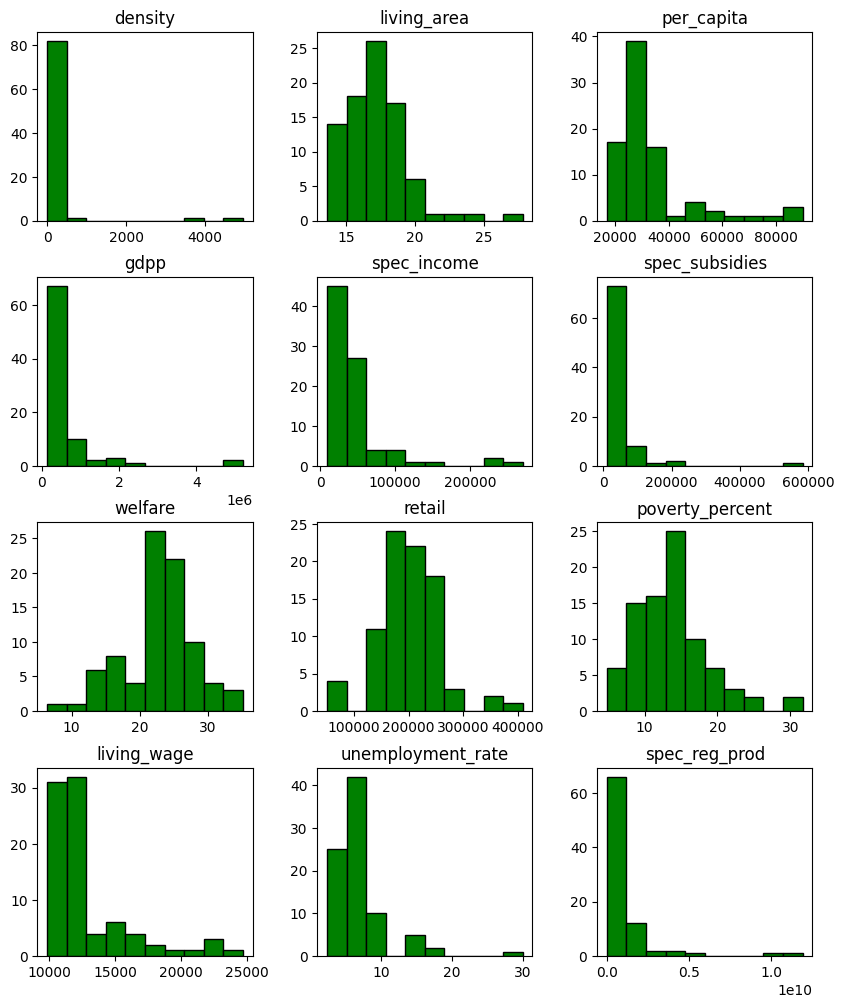

In [21]:
# визуализируем распределение признаков
model_df.hist(figsize=(10, 12), grid = False,color='green');
plt.show()

Не все гистограммы имеют симметричный вид, что говорит о наличии нескольких групп. Также нельзя утверждать, что данные признаков имеют нормальное распределение. Проведем статистический тест Шапиро-Уилка на нормальность.

In [22]:
for col in model_df.columns:
    _, p = shapiro(model_df[col])
    print(f'{col}:   p-value = {p:.2f}')

density:   p-value = 0.00
living_area:   p-value = 0.00
per_capita:   p-value = 0.00
gdpp:   p-value = 0.00
spec_income:   p-value = 0.00
spec_subsidies:   p-value = 0.00
welfare:   p-value = 0.01
retail:   p-value = 0.01
poverty_percent:   p-value = 0.00
living_wage:   p-value = 0.00
unemployment_rate:   p-value = 0.00
spec_reg_prod:   p-value = 0.00


Тест подтверждает сделанное предположение. Только welfare и retail можно считать нормально распределенными. Все остальные признаки не имеют нормального распределения.

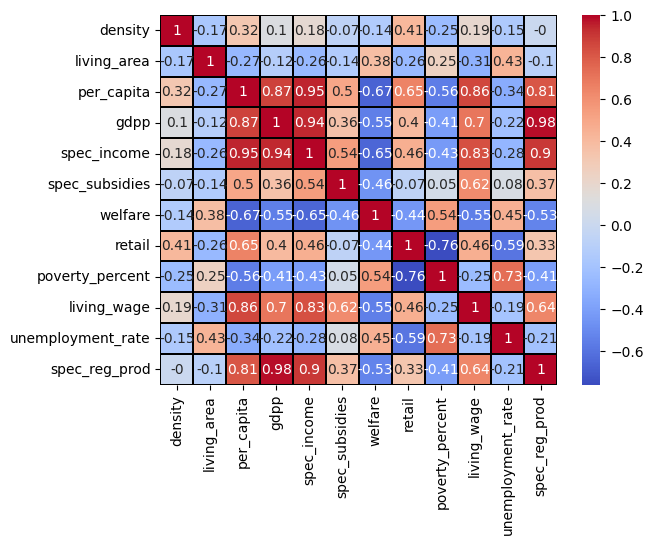

In [38]:
# создадим визуализацию значении матрицы корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True,cmap='coolwarm',linewidths=0.1, linecolor='black')
plt.show()

В признаках ***gdpp***(валовой региональный продукт), ***spec_reg_prod***(удельный объем регионального производства на душу населения), ***spec_income***(собственные доходы региона на душу населения),  ***per_capita*** (среднедушевые денежные доходы), ***living_wage*** (прожиточный минимум региона) имеют сильную линейную зависимость, один из сильнокореллирующих признаков можно убрать для обучения, так как они  практически одинаковые. Напротив признаки ***welfare***(расходы на социальную политику)  и ***per_capita*** (среднедушевые денежные доходы), ***retail*** (объем розничной торговли) и ***poverty_percent*** (доля населения региона, живущих за чертой бедности) имеют обратную корреляцию со значением -0,67 и -0.75.

Удалим из набора признаки ***spec_reg_prod***, ***per_capita***, ***spec_income***. 

In [39]:
model_df = model_df.drop(['spec_reg_prod', 'per_capita', 'spec_income'], axis=1)
model_df.shape

(85, 9)

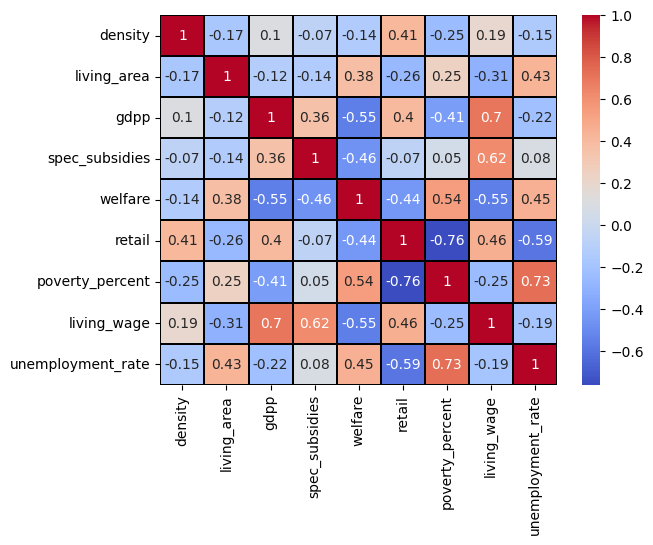

In [40]:
# повторно визуализируем матрицу корреляции всех пар признаков в виде тепловой карты

sns.heatmap(model_df.corr().round(decimals=2), annot=True,cmap='coolwarm',linewidths=0.1, linecolor='black')
plt.show()

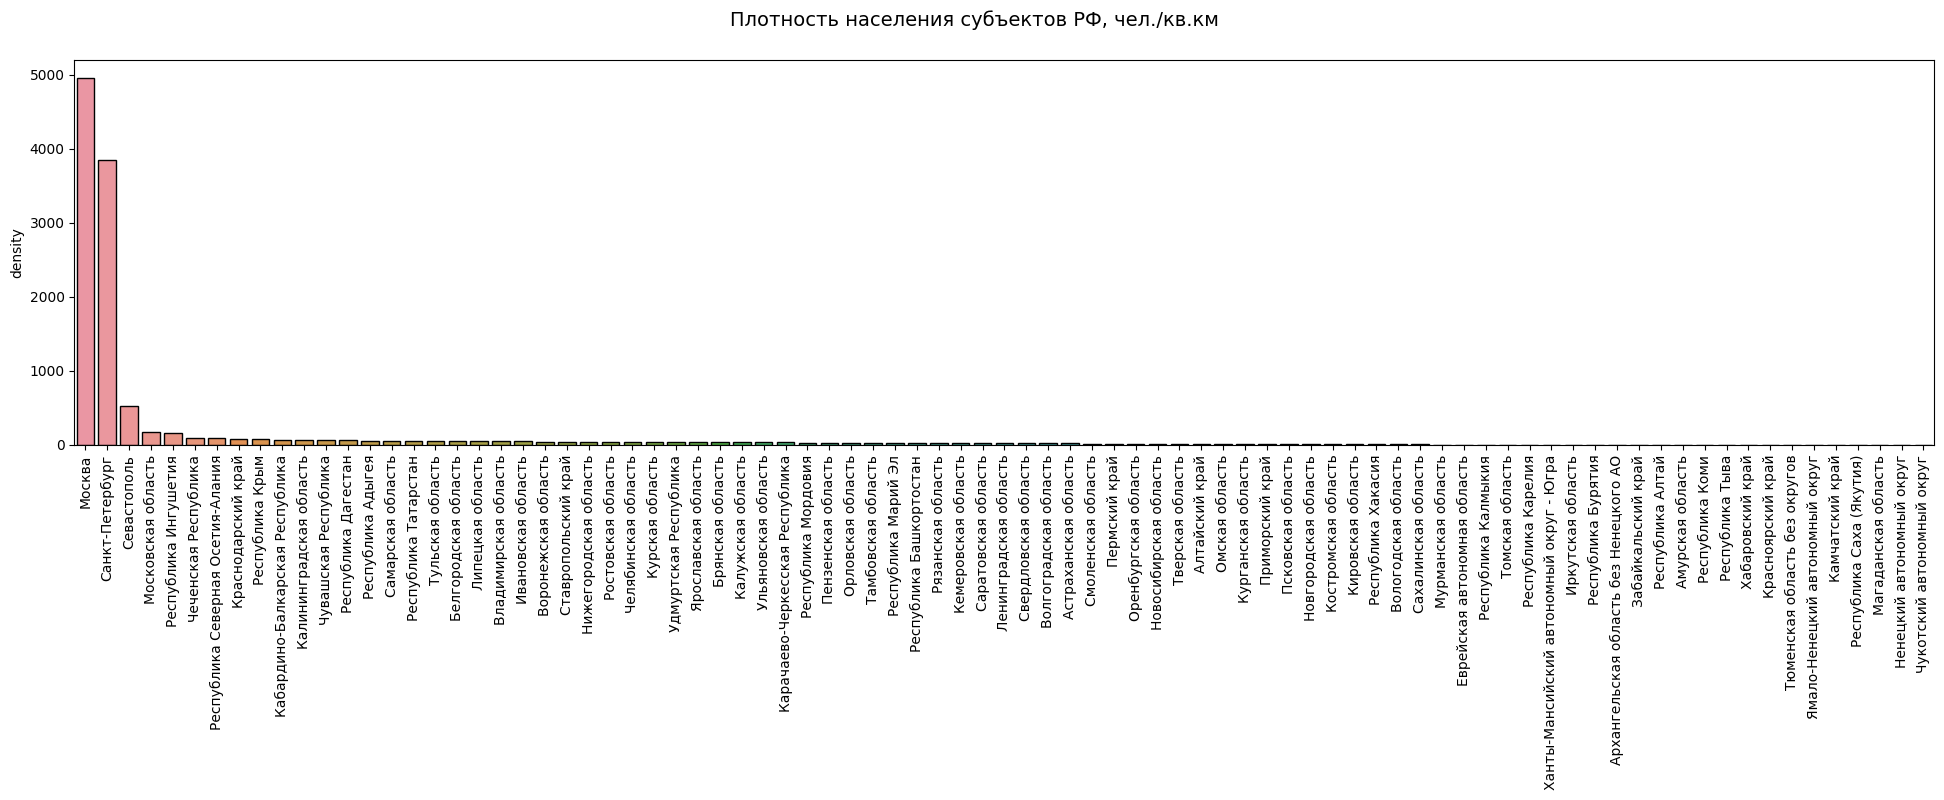

In [42]:
# посмотрим график распределения плотности населения
bar_pl_df = df.sort_values(by='density', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='density'
);
fig.suptitle(
    'Плотность населения субъектов РФ, чел./кв.км',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Плотность 4950 чел./кв.км соответствует Москве, что соответсвует действительности.

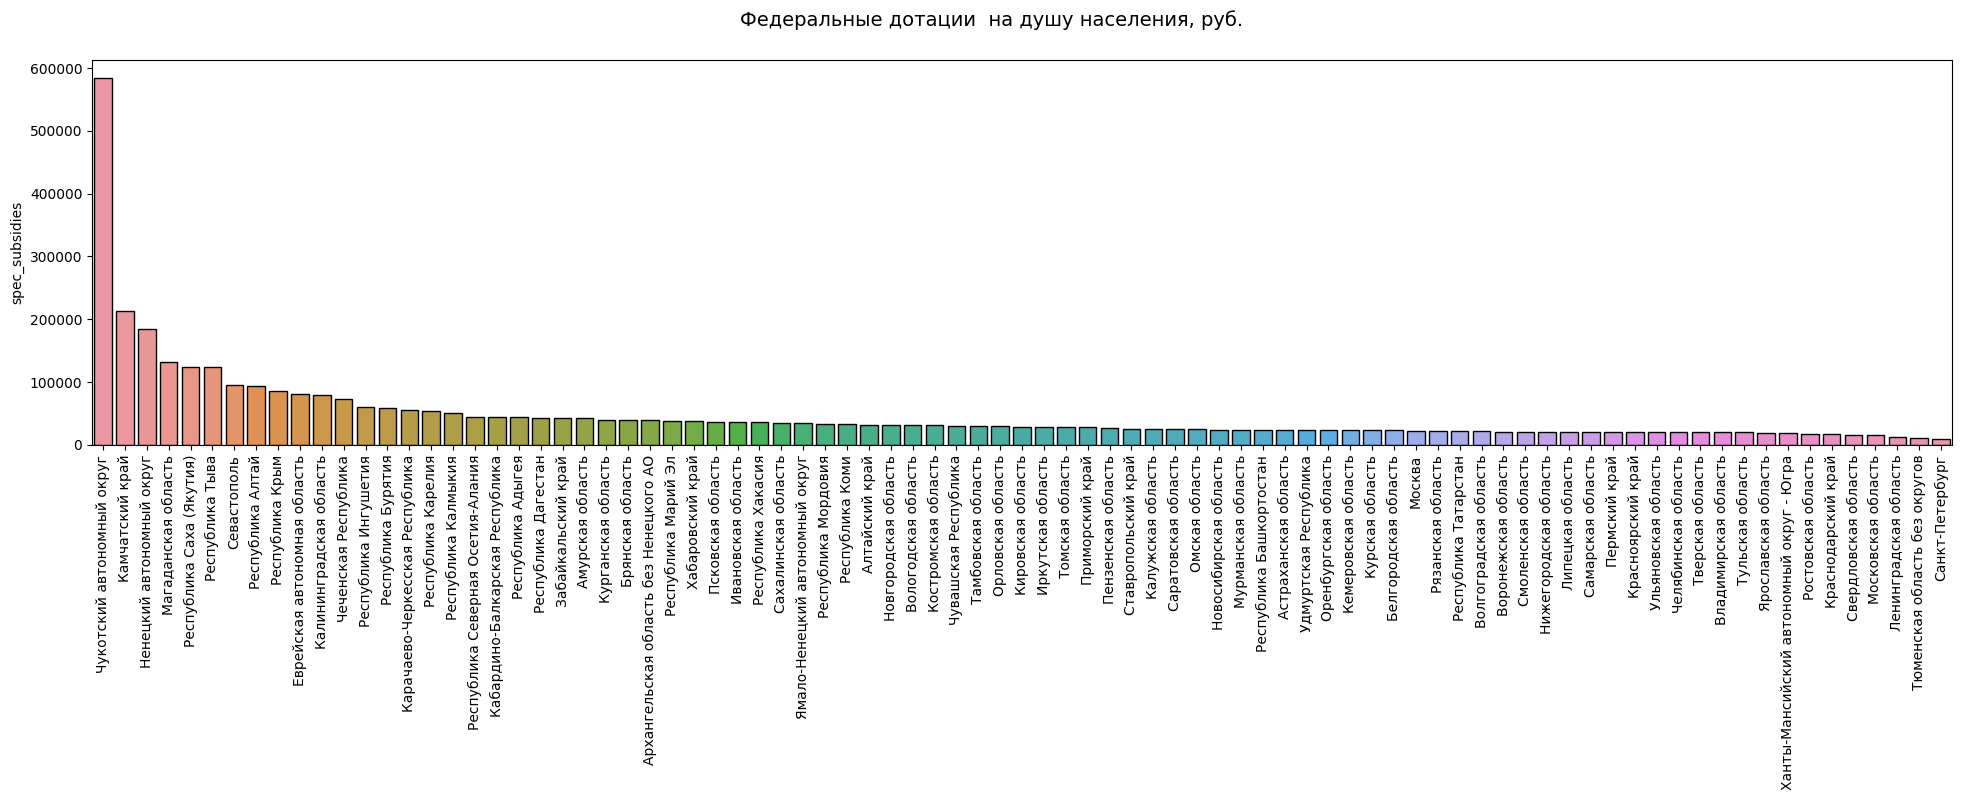

In [44]:
# посмотрим график распределения федеральных дотаций на душу населения
bar_pl_df = df.sort_values(by='spec_subsidies', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='spec_subsidies'
);
fig.suptitle(
    'Федеральные дотации  на душу населения, руб.',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

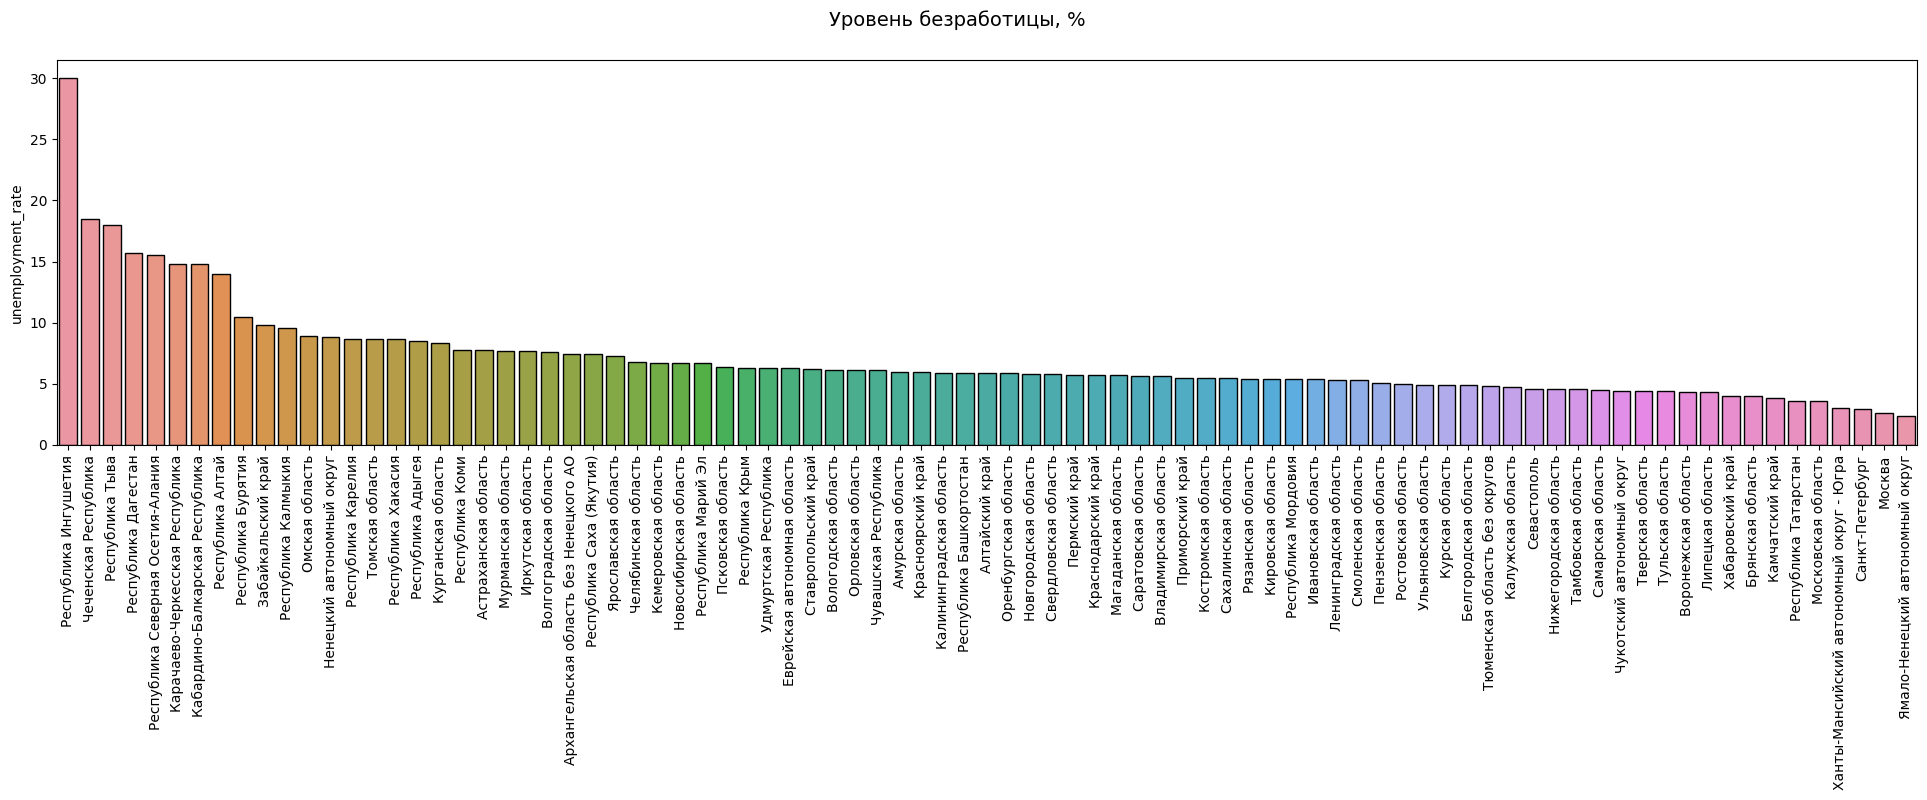

In [46]:
# посмотрим график распределения уровня безработицы
bar_pl_df = df.sort_values(by='unemployment_rate', ascending=False)
fig = plt.figure(figsize=(24,5))
sns.barplot(
    data=bar_pl_df,
    x=bar_pl_df.index,
    y='unemployment_rate'
);
fig.suptitle(
    'Уровень безработицы, %',
    fontsize=14);
plt.xlabel('')
plt.xticks(rotation = 90);

Из графиков выше видно, что для регионов с очень низкой и очень высокой плотностью населения и высокими федеральными дотациями характерен низкий уровень безработицы. Что может свидетельствовать о разных причинах этой зависимости. Источник доходов региона и, как следствие, сфера занятости могут влиять на распределение регионов по группам социального благополучия.

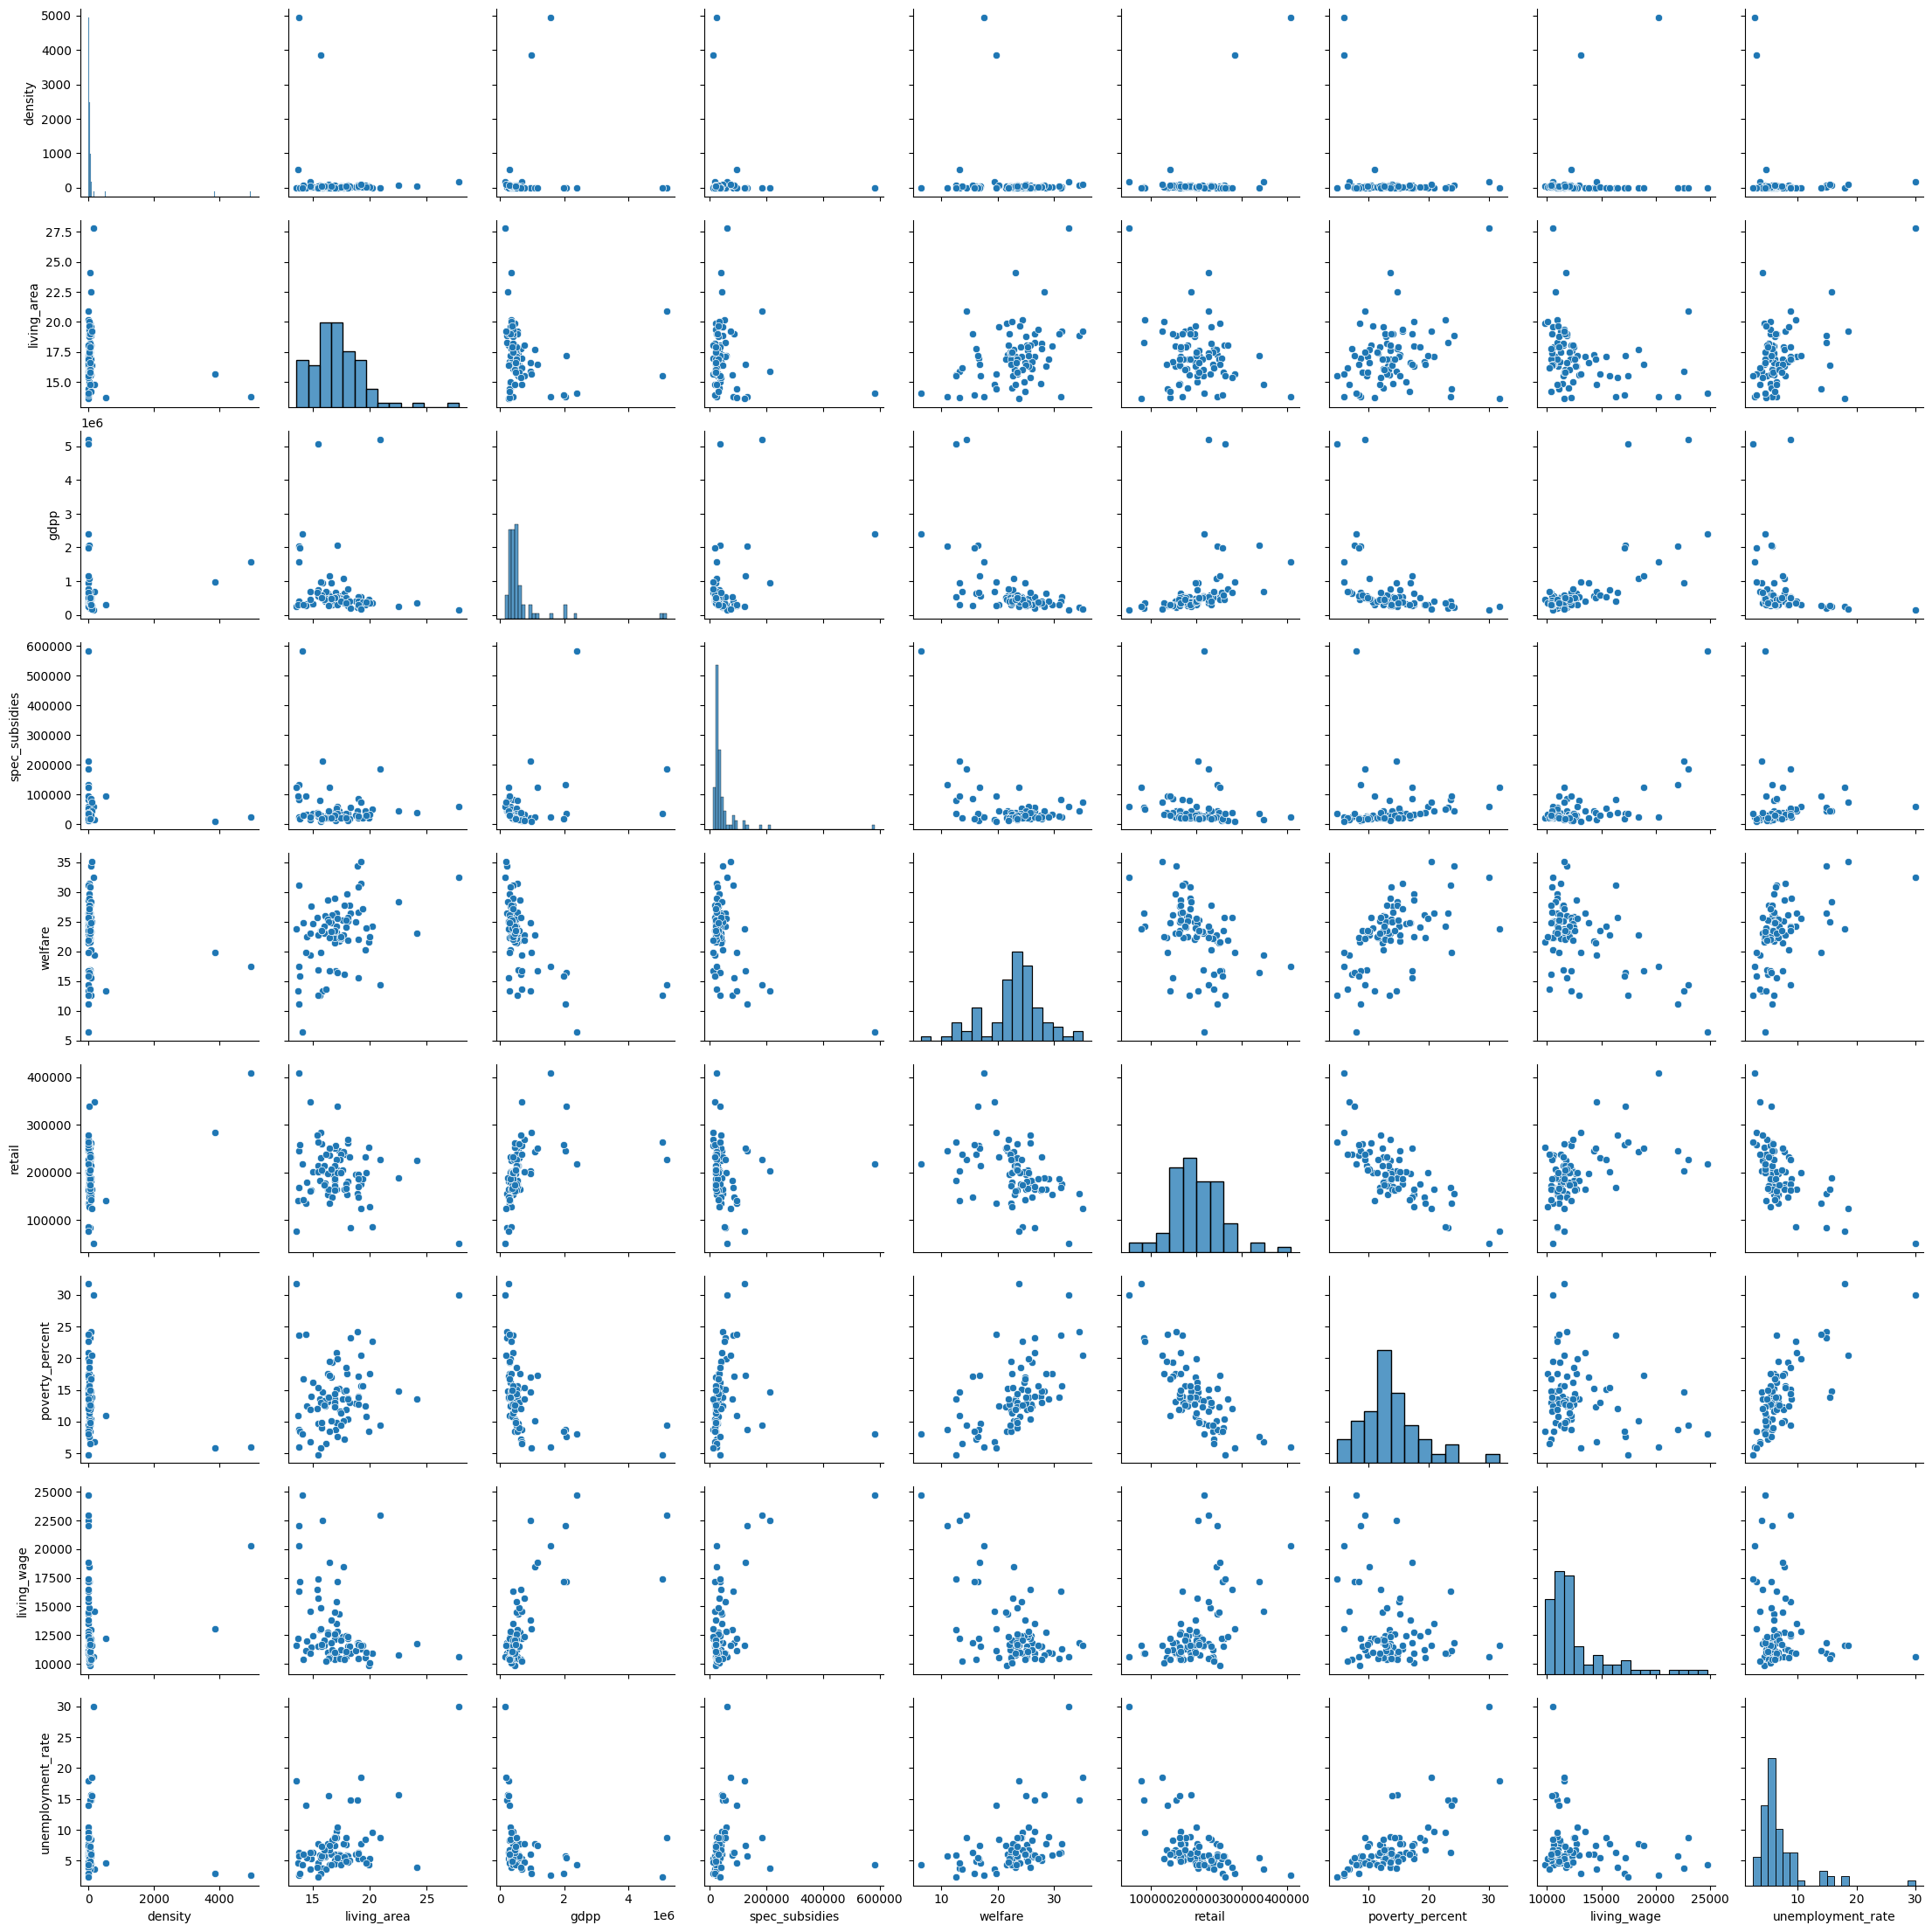

In [52]:
# Создадим матрицу диаграмм разброса для признаков
sns.pairplot(model_df)

Как и на тепловой карте корреляции, некоторые пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику. кроме того во многих парах наблюдается распределение наблюдений в виде групп.

### <center> 3. Cохранение данных.

In [23]:
model_df.to_csv('./data/model_df.csv')